In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import datetime as dt
import seaborn as sns

import itertools
from itertools import combinations
import collections
from collections import Counter

plt.style.use("seaborn")
sns.set_style("darkgrid")


<ipython-input-1-e8f37dae5b85>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
os.listdir("files")

['Sales_March_2019.csv',
 'Sales_January_2019.csv',
 'Sales_June_2019.csv',
 'Sales_October_2019.csv',
 'Sales_April_2019.csv',
 'Sales_September_2019.csv',
 'Sales_February_2019.csv',
 'Sales_July_2019.csv',
 'Sales_December_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_August_2019.csv']

In [ ]:
df_sales_april = pd.read_csv("/content/files/Sales_April_2019.csv")

In [ ]:
df = pd.DataFrame()

In [ ]:
files = os.listdir("files")
for i in files:
  file=pd.read_csv("files/"+i)
  df = pd.concat([file,df])

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


# Analisis exploratorio inicial

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
df.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
True      True     True              True        True        True                   545
dtype: int64

In [ ]:
df["Order ID"].isnull().value_counts()

False    186305
True        545
Name: Order ID, dtype: int64

In [ ]:
df=df[df["Order ID"].notnull()]

In [ ]:
df.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
dtype: int64

Definir el tipo de cada variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [ ]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"


In [ ]:
df=df[df["Product"] != "Product"]

In [ ]:
df["Quantity Ordered"]=pd.to_numeric(df["Quantity Ordered"])
df["Price Each"]=pd.to_numeric(df["Price Each"])
df["Order Date"]=pd.to_datetime(df["Order Date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


# ¿Cuál fue el mes con la venta más alta?

In [ ]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"


In [ ]:
#extraer el mes

df["Mes"]=df["Order Date"].dt.month

In [ ]:
#Determinar el numero total de ventas

df["Total_Ventas"] = df["Quantity Ordered"]*df["Price Each"]

In [ ]:
#agrupación por mes

df_mes = df.groupby("Mes").sum()

#resetear indice

df_mes = df_mes.reset_index()

<ipython-input-21-76484b3bbe0b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mes = df.groupby("Mes").sum()


<BarContainer object of 12 artists>

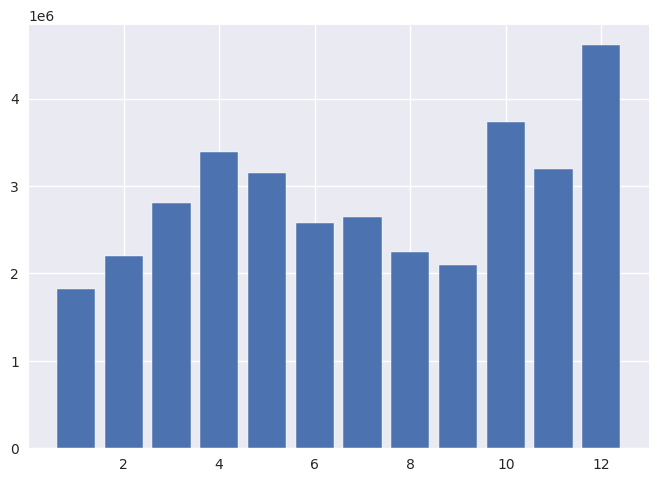

In [ ]:
plt.bar(df_mes["Mes"], df_mes["Total_Ventas"])

In [ ]:
#Agrupación por fechas

df_fechas=df.groupby("Order Date").sum()

<ipython-input-23-9627f4ea73fb>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_fechas=df.groupby("Order Date").sum()


In [ ]:
df_fechas=df_fechas.resample("w").sum()
df_fechas

,Quantity Ordered,Price Each,Mes,Total_Ventas
Order Date,,,,
2019-01-06,2045,343062.87,1815,344855.67
2019-01-13,2457,407539.11,2199,409428.28
2019-01-20,2462,392745.06,2200,394936.90
2019-01-27,2525,424518.30,2237,426632.16
2019-02-03,2780,456563.41,3728,460355.55
2019-02-10,3299,563327.94,5934,566203.88
2019-02-17,3435,565026.42,6114,568227.10
2019-02-24,3397,530962.84,5976,535323.33
2019-03-03,3543,575845.83,7832,578418.38


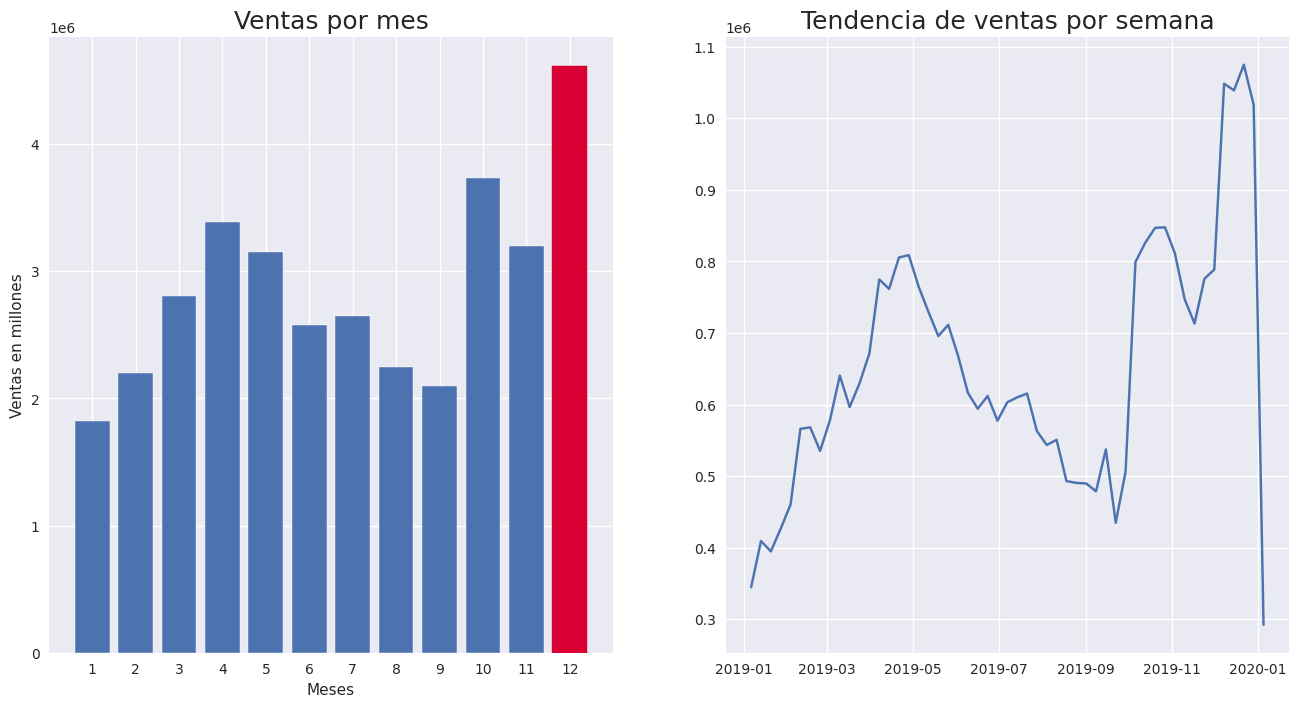

In [ ]:
#contratste de graficos

fig, axes=plt.subplots(1,2, figsize=(16,8))
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

bars=ax1.bar(df_mes["Mes"], df_mes["Total_Ventas"])
ax2.plot(df_fechas["Total_Ventas"])

ax1.set_xticks(df_mes["Mes"])


#estilos
ax1.set_title("Ventas por mes", size=18)
ax2.set_title("Tendencia de ventas por semana", size=18)

ax1.set_xlabel("Meses")
ax1.set_ylabel("Ventas en millones")
bars[11].set_color("#D80032")


plt.show()

¿Cual es la ciudad con más ventas?

In [ ]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Mes', 'Total_Ventas'],
      dtype='object')

In [ ]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99


In [ ]:
dr=df.iloc[0,5]
dr

'359 Spruce St, Seattle, WA 98101'

In [ ]:
dr.split(",")

['359 Spruce St', ' Seattle', ' WA 98101']

In [ ]:
dr.split(",")[1]

' Seattle'

In [ ]:
df["Ciudad"]=df['Purchase Address'].apply(lambda x: x.split(",")[1])
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas


In [ ]:
df_ciudad=df.groupby("Ciudad").sum()

df_ciudad=df_ciudad.reset_index()

<ipython-input-33-4595e8850065>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ciudad=df.groupby("Ciudad").sum()


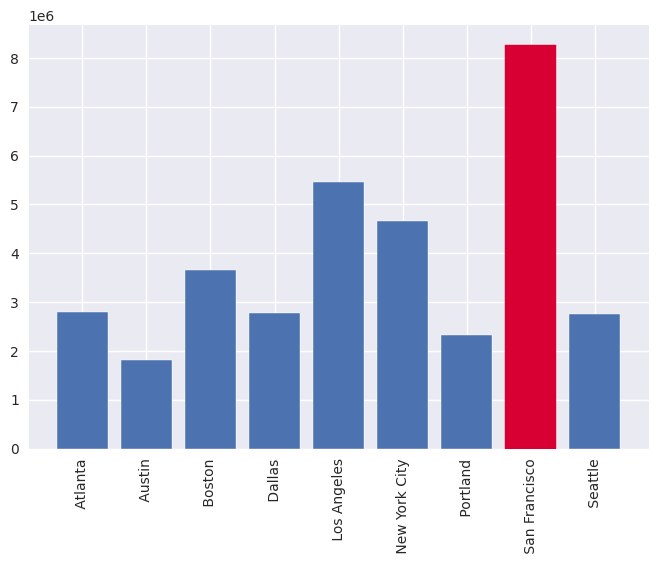

In [ ]:
bars=plt.bar(df_ciudad["Ciudad"], df_ciudad["Total_Ventas"])
plt.xticks(rotation=90)

bars[7].set_color("#D80032")

plt.show()

# ¿Cual es la hora en que se venden más productos?

In [ ]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas


In [ ]:
df["Hora"]=df["Order Date"].apply(lambda x: x.hour)
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad,Hora
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15


Agrupacion por hora

In [ ]:
df_hour= df.groupby("Hora").sum()
df_hour=df_hour.reset_index()

<ipython-input-37-e836cfd89256>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hour= df.groupby("Hora").sum()


crear grafica de lineas

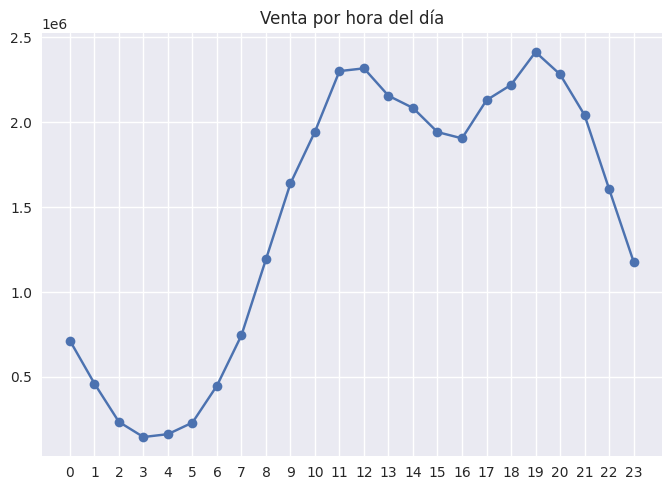

In [ ]:
plt.plot(df_hour["Total_Ventas"], marker="o")
plt.xticks(df_hour["Hora"])

plt.title("Venta por hora del día")



plt.show()

# ¿Cuáles son los productos que se venden juntos?

In [ ]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad,Hora
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15


In [ ]:
df=df[df["Order ID"].duplicated(keep=False)]

df["agrupado"]=df.groupby(["Order ID"])["Product"].transform(lambda x: ",".join(x))

df=df[["Order ID", "agrupado"]].drop_duplicates()

df.head(2)

,Order ID,agrupado
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"


In [ ]:
count=Counter()

for i in df["agrupado"]:
  filas=i.split(",")
  count.update(Counter(combinations(filas,2)))

count

Counter({('AA Batteries (4-pack)', 'USB-C Charging Cable'): 37,
         ('iPhone', 'Apple Airpods Headphones'): 360,
         ('Google Phone', 'Wired Headphones'): 414,
         ('Vareebadd Phone', 'USB-C Charging Cable'): 361,
         ('27in 4K Gaming Monitor', 'USB-C Charging Cable'): 12,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
         ('LG Dryer', 'AA Batteries (4-pack)'): 4,
         ('Bose SoundSport Headphones', 'AAA Batteries (4-pack)'): 37,
         ('AAA Batteries (4-pack)', 'AA Batteries (4-pack)'): 39,
         ('iPhone', 'Wired Headphones'): 447,
         ('USB-C Charging Cable', 'Apple Airpods Headphones'): 34,
         ('Lightning Charging Cable', 'Lightning Charging Cable'): 54,
         ('AAA Batteries (4-pack)', '27in FHD Monitor'): 22,
         ('Flatscreen TV', 'USB-C Charging Cable'): 7,
         ('USB-C Charging Cable', 'Wired H

In [ ]:
comunes=count.most_common(10)
comunes

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# ¿Cuál es el producto más vendido?

In [ ]:
df.head(2)

,Order ID,agrupado
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"


In [ ]:
df["agrupado"]=df["agrupado"].str.split(",")

In [ ]:
df = df.explode("agrupado")

In [ ]:
df.head(2)

,Order ID,agrupado
46,236716,AA Batteries (4-pack)
46,236716,USB-C Charging Cable


In [ ]:
df["agrupado"].unique()

array(['AA Batteries (4-pack)', 'USB-C Charging Cable', 'iPhone',
       'Apple Airpods Headphones', 'Google Phone', 'Wired Headphones',
       'Vareebadd Phone', '27in 4K Gaming Monitor',
       'Lightning Charging Cable', 'Bose SoundSport Headphones',
       'LG Dryer', 'AAA Batteries (4-pack)', '27in FHD Monitor',
       'Flatscreen TV', '34in Ultrawide Monitor', 'Macbook Pro Laptop',
       'ThinkPad Laptop', '20in Monitor', 'LG Washing Machine'],
      dtype=object)

In [ ]:
conteo = df["agrupado"].value_counts()

In [ ]:
df_pv = pd.DataFrame({"Productos":conteo.index, "Ventas": conteo.values})
df_pv

,Productos,Ventas
0,USB-C Charging Cable,2111
1,iPhone,1867
2,Lightning Charging Cable,1827
3,Wired Headphones,1674
4,Google Phone,1639
5,Apple Airpods Headphones,974
6,Bose SoundSport Headphones,820
7,AAA Batteries (4-pack),815
8,AA Batteries (4-pack),768
9,Vareebadd Phone,601


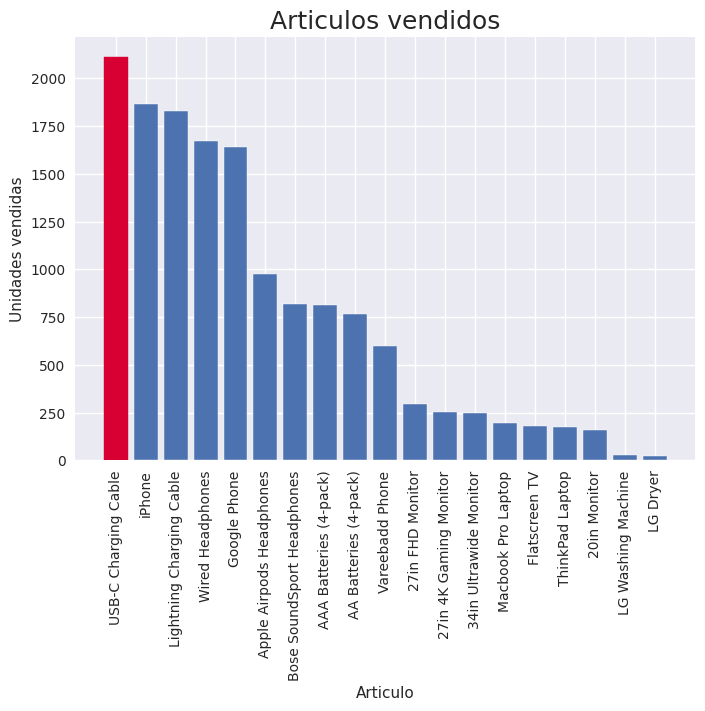

In [ ]:
bars_1=plt.bar(df_pv["Productos"], df_pv["Ventas"])
plt.xticks(rotation=90)

plt.title("Articulos vendidos", size=18)

plt.ylabel("Unidades vendidas")
plt.xlabel("Articulo")

bars_1[0].set_color("#D80032")

plt.show()